In [ ]:
import arviz as az

# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt

# NumPy用ライブラリ
import numpy as np

# pandas用ライブラリ
import pandas as pd
import pymc as pm

# seaborn
# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode="fixed")
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams["figure.figsize"] = (6, 6)
# 方眼表示ON
plt.rcParams["axes.grid"] = True
# データフレームでの表示精度
pd.options.display.float_format = "{:.3f}".format
# データフレームですべての項目を表示
pd.set_option("display.max_columns", None)

In [31]:
data = np.array([1, 0, 0, 1, 0])
# コンテキスト定義

model1 = pm.Model()

with pm.Model() as model:
    # ---------------------------------------------------------
    # 【1. 事前分布】 (Prior)
    # ここで「確率は0〜1のどこか（一様）」と定義しています。
    # ---------------------------------------------------------
    theta = pm.Uniform("theta", lower=0, upper=1)

    # ---------------------------------------------------------
    # 【2. 尤度】 (Likelihood)
    # ここで「データはこの確率 theta に従って発生した」と定義しています。
    # 「observed=data」があるのが目印です。
    # ---------------------------------------------------------
    y = pm.Bernoulli("y", p=theta, observed=data)

    # ---------------------------------------------------------
    # 【3. 計算実行】
    # 上記の2つを使って、pm.sample が計算を行います
    # ---------------------------------------------------------
    idata1_1 = pm.sample(chains=2, tune=2000, draws=2000, random_seed=0)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


Output()

/usr/local/lib/python3.12/site-packages/pytensor/scalar/basic.py:3153: RuntimeWarning: divide by zero encountered in log1p
  return np.log1p(x)
/usr/local/lib/python3.12/site-packages/pytensor/tensor/elemwise.py:710: RuntimeWarning: divide by zero encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/usr/local/lib/python3.12/site-packages/pytensor/scalar/basic.py:2094: RuntimeWarning: divide by zero encountered in divide
  return x / y
/usr/local/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


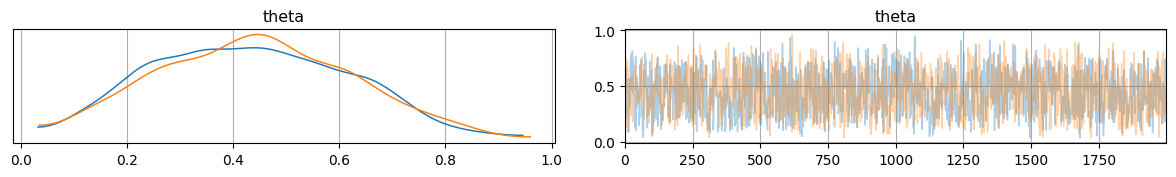

In [32]:
axes = az.plot_trace(idata1_1, compact=False)
plt.tight_layout();

NameError: name 'ax' is not defined

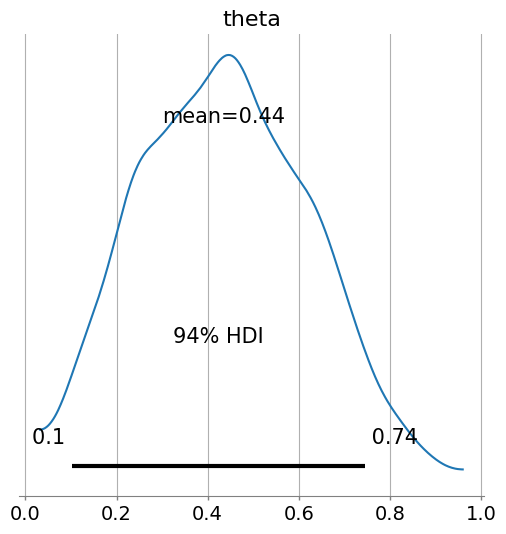

In [33]:
az.plot_posterior(idata1_1)
ax.set_xlim(0, 1)
ax.set_title("事後分布")

In [34]:
summary1_1 = az.summary(idata1_1)
display(summary1_1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.436,0.179,0.102,0.745,0.005,0.002,1560.000,2511.000,1.000


In [ ]:
model2 = pm.Model()
with model2:
    p = pm.Uniform("p", lower=0, upper=1)
    X_obs = pm.Binomial("X_obs", n=5, p=p, observed=2)
    idata1_2 = pm.sample(chains=2, tune=2000, draws=2000, random_seed=0)


In [17]:
g = pm.model_to_graphviz(model1)
display(g)